In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

awards = pd.read_csv("data/awards_data.csv")
player_data = pd.read_csv("data/player_stats.csv")
team_data = pd.read_csv("data/team_stats.csv")
rebounding_data = pd.read_csv("data/team_rebounding_data_22.csv")

# Data Wrangling

## player_data part

**An explanation of each variables in player_Data file:**


'nbapersonid': Unique identifier for each NBA player.

'player': Name of the NBA player.

'draftyear': The year the player was drafted into the NBA.

draftpick: The player's draft pick number in the year they were drafted.

season: The NBA season in which the statistics were recorded.

nbateamid: Unique identifier for each NBA team.

team: Name of the NBA team for which the player played during the specified season.

games: Number of games the player participated in during the season.

games_start: Number of games the player as the started member during the season.

mins: Total minutes played by the player during the season.

fgm: Number of field goals made by the player.

fga: Number of field goals attempted by the player.

fgp: Field goal percentage, calculated as (fgm / fga) * 100.

fgm3: Number of three-point field goals made by the player.

fga3: Number of three-point field goals attempted by the player.

fgp3: Three-point field goal percentage, calculated as (fgm3 / fga3) * 100.

fgm2: Number of two-point field goals made by the player.

fga2: Number of two-point field goals attempted by the player.

fgp2: Two-point field goal percentage, calculated as (fgm2 / fga2) * 100.

efg: Effective field goal percentage, a measure that adjusts for the value of three-point shots, calculated as ((fgm + (0.5 * fgm3)) / fga) * 100.

ftm: Number of free throws made by the player.

fta: Number of free throws attempted by the player.

ftp: Free throw percentage, calculated as (ftm / fta) * 100.

off_reb: Number of offensive rebounds grabbed by the player.

def_reb: Number of defensive rebounds grabbed by the player.

tot_reb: Total number of rebounds grabbed by the player.

ast: Number of assists made by the player.

steals: Number of steals made by the player.

blocks: Number of blocks made by the player.

tov: Number of turnovers committed by the player.

tot_fouls: Total number of fouls committed by the player.

points: Total points scored by the player.

PER: Player Efficiency Rating, a measure of a player's per-minute productivity.

FTr: Free Throw Rate, a ratio of free throws attempted to field goals attempted.

off_reb_pct: Offensive Rebound Percentage, the percentage of available offensive rebounds grabbed by the player while on the court.

def_reb_pct: Defensive Rebound Percentage, the percentage of available defensive rebounds grabbed by the player while on the court.

tot_reb_pct: Total Rebound Percentage, the percentage of available rebounds grabbed by the player while on the court.

ast_pct: Assist Percentage, the percentage of teammate field goals a player assisted while on the court.

stl_pct: Steal Percentage, the percentage of opponent possessions that end with a steal by the player while on the court.

blk_pct: Block Percentage, the percentage of opponent two-point field goal attempts blocked by the player while on the court.

tov_pct: Turnover Percentage, the percentage of the player's possessions that end with a turnover while on the court.

usg: Usage Percentage, an estimate of the percentage of team plays used by a player while on the court.

OWS: Offensive Win Shares, an estimate of the number of wins contributed by a player's offense.

DWS: Defensive Win Shares, an estimate of the number of wins contributed by a player's defense.

WS: Win Shares, an estimate of the total number of wins contributed by a player.

OBPM: Offensive Box Plus/Minus, a box score-based metric that estimates a player's impact on team performance per 100 possessions through offensive contributions.

DBPM: Defensive Box Plus/Minus, a box score-based metric that estimates a player's impact on team performance per 100 possessions through defensive contributions.

BPM: Box Plus/Minus, a box score-based metric that estimates a player's overall impact on team performance per 100 possessions.

VORP: Value over Replacement Player, an estimate of the points per 100 team possessions that a player contributed above a replacement-level player, translated to an average team.

First of all, we will inspect the data.

In [2]:
player_data.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1


Then let's understand its structure and dectct any missing values.

In [3]:
print(player_data.isnull().sum())
player_data.dtypes

nbapersonid       0
player            0
draftyear         0
draftpick      1763
season            0
nbateamid         0
team              0
games             0
games_start       0
mins              0
fgm               0
fga               0
fgp              54
fgm3              0
fga3              0
fgp3           1044
fgm2              0
fga2              0
fgp2            115
efg              54
ftm               0
fta               0
ftp             490
off_reb           0
def_reb           0
tot_reb           0
ast               0
steals            0
blocks            0
tov               0
tot_fouls         0
points            0
PER               0
FTr              54
off_reb_pct       0
def_reb_pct       0
tot_reb_pct       0
ast_pct           0
stl_pct           0
blk_pct           0
tov_pct          45
usg               0
OWS               0
DWS               0
WS                0
OBPM              0
DBPM              0
BPM               0
VORP              0
dtype: int64


nbapersonid      int64
player          object
draftyear        int64
draftpick      float64
season           int64
nbateamid        int64
team            object
games            int64
games_start      int64
mins             int64
fgm              int64
fga              int64
fgp            float64
fgm3             int64
fga3             int64
fgp3           float64
fgm2             int64
fga2             int64
fgp2           float64
efg            float64
ftm              int64
fta              int64
ftp            float64
off_reb          int64
def_reb          int64
tot_reb          int64
ast              int64
steals           int64
blocks           int64
tov              int64
tot_fouls        int64
points           int64
PER            float64
FTr            float64
off_reb_pct    float64
def_reb_pct    float64
tot_reb_pct    float64
ast_pct        float64
stl_pct        float64
blk_pct        float64
tov_pct        float64
usg            float64
OWS            float64
DWS        

In [4]:
print(player_data.columns)

Index(['nbapersonid', 'player', 'draftyear', 'draftpick', 'season',
       'nbateamid', 'team', 'games', 'games_start', 'mins', 'fgm', 'fga',
       'fgp', 'fgm3', 'fga3', 'fgp3', 'fgm2', 'fga2', 'fgp2', 'efg', 'ftm',
       'fta', 'ftp', 'off_reb', 'def_reb', 'tot_reb', 'ast', 'steals',
       'blocks', 'tov', 'tot_fouls', 'points', 'PER', 'FTr', 'off_reb_pct',
       'def_reb_pct', 'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct',
       'tov_pct', 'usg', 'OWS', 'DWS', 'WS', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')


Then let's clean the players data by dropping and cleaning the null value

In [5]:
null_values_summary = player_data.isnull().sum()
columns_with_nulls = null_values_summary[null_values_summary > 0]
print(columns_with_nulls)


draftpick    1763
fgp            54
fgp3         1044
fgp2          115
efg            54
ftp           490
FTr            54
tov_pct        45
dtype: int64


Understanding the content, draftpick is not central to our anlaysis, so we will consider to drop the variable. The null values in fgp, fgp3, fgp2,efg, ftp, Ftr,tov_pct would be replaced with zeros. This accurately reflects that they had no impact in these specific areas, which is valuable information for our analysis.

In [6]:
player_data_clean = player_data.drop(columns=['draftpick'])
columns_to_replace_zeros = ['fgp', 'fgp3', 'fgp2', 'efg', 'ftp', 'FTr','tov_pct']
player_data_clean[columns_to_replace_zeros] = player_data_clean[columns_to_replace_zeros].replace(np.nan,0)

Then we can detect the duplicate rows.

In [7]:
duplicates = player_data_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 11


In [8]:
duplicated_rows = player_data_clean[player_data_clean.duplicated()]
duplicated_rows

,nbapersonid,player,draftyear,season,nbateamid,team,games,games_start,mins,fgm,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
2729,203099,Jared Cunningham,2012,2012,1610612742,DAL,8,0,26,6,...,0.000,0.118,0.296,0.0,0.0,0.0,0.4,-1.9,-1.5,0.0
3140,203099,Jared Cunningham,2012,2013,1610612737,ATL,5,0,22,1,...,0.000,0.410,0.101,-0.1,0.0,-0.1,-9.0,-2.4,-11.4,-0.1
3608,203099,Jared Cunningham,2012,2013,1610612758,SAC,8,0,58,5,...,0.000,0.000,0.191,0.1,0.0,0.2,-3.7,2.4,-1.3,0.0
3911,203099,Jared Cunningham,2012,2014,1610612746,LAC,19,0,89,12,...,0.000,0.153,0.232,-0.1,0.1,0.0,-6.1,-2.0,-8.1,-0.1
4358,203099,Jared Cunningham,2012,2015,1610612739,CLE,40,3,355,32,...,0.005,0.138,0.166,-0.2,0.4,0.1,-5.5,0.0,-5.6,-0.3
4556,203099,Jared Cunningham,2012,2015,1610612749,MIL,4,0,55,4,...,0.000,0.149,0.164,-0.1,0.0,0.0,-5.3,-1.5,-6.8,-0.1
5658,1628476,Derrick Walton Jr.,2017,2017,1610612748,MIA,16,0,147,8,...,0.017,0.067,0.091,0.2,0.2,0.4,-1.1,2.4,1.3,0.1
6722,1628476,Derrick Walton Jr.,2017,2019,1610612765,DET,3,0,26,1,...,0.000,0.250,0.067,0.0,0.0,0.1,-2.9,4.7,1.8,0.0
6804,1628476,Derrick Walton Jr.,2017,2019,1610612746,LAC,23,1,222,17,...,0.000,0.091,0.083,0.4,0.2,0.5,-2.2,0.9,-1.3,0.0
7343,1629686,Deividas Sirvydis,2019,2020,1610612765,DET,20,0,133,14,...,0.000,0.105,0.157,-0.1,0.1,0.0,-4.5,-1.1,-5.6,-0.1


11 duplicated rows might indicate that the players have participated in different teams and games due to being traded, signed, or other reasons. This is an important observation.

In [9]:
# Convert all names to lower case and all team name to upper case
player_data_clean['player'] = player_data_clean['player'].str.lower()
player_data_clean['team'] = player_data_clean['team'].str.upper()
# convert some features name to a more readable form
player_data_clean = player_data_clean.rename(columns={'nbapersonid': 'personID'})
player_data_clean = player_data_clean.rename(columns={'player': 'name'})
player_data_clean = player_data_clean.rename(columns={'nbateamid': 'teamID'})
player_data_clean = player_data_clean.rename(columns={'games': 'game_played'})
player_data_clean = player_data_clean.rename(columns={'games_start': 'games_as_the_start'})# the number of games that the player played as the starting team

In [10]:
player_data_clean

,personID,name,draftyear,season,teamID,team,game_played,games_as_the_start,mins,fgm,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,zaza pachulia,2003,2007,1610612737,ATL,62,5,944,107,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,solomon jones,2006,2007,1610612737,ATL,35,0,145,12,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,josh smith,2004,2007,1610612737,ATL,81,81,2873,518,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,acie law,2007,2007,1610612737,ATL,56,6,865,95,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,salim stoudamire,2005,2007,1610612737,ATL,35,0,402,65,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,1630648,jordan schakel,2021,2021,1610612764,WAS,4,0,30,1,...,0.000,0.078,0.191,-0.2,0.0,-0.1,-8.6,-4.4,-13.0,-0.1
8488,1630557,corey kispert,2021,2021,1610612764,WAS,77,36,1801,234,...,0.010,0.085,0.146,1.6,0.7,2.3,-0.8,-1.5,-2.3,-0.1
8489,1628398,kyle kuzma,2017,2021,1610612764,WAS,66,66,2204,423,...,0.022,0.141,0.242,0.0,2.0,2.0,0.2,-0.4,-0.2,1.0
8490,203526,raul neto,2013,2021,1610612764,WAS,70,19,1372,204,...,0.002,0.139,0.184,0.7,0.8,1.5,-2.5,-0.5,-3.0,-0.4


We will try to put all number type features into the list.

In [11]:
player_data_clean.select_dtypes(include=['float64', 'int64'])

,personID,draftyear,season,teamID,game_played,games_as_the_start,mins,fgm,fga,fgp,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,2003,2007,1610612737,62,5,944,107,245,0.437,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,2006,2007,1610612737,35,0,145,12,30,0.400,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,2004,2007,1610612737,81,81,2873,518,1133,0.457,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,2007,2007,1610612737,56,6,865,95,237,0.401,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,2005,2007,1610612737,35,0,402,65,180,0.361,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,1630648,2021,2021,1610612764,4,0,30,1,11,0.091,...,0.000,0.078,0.191,-0.2,0.0,-0.1,-8.6,-4.4,-13.0,-0.1
8488,1630557,2021,2021,1610612764,77,36,1801,234,514,0.455,...,0.010,0.085,0.146,1.6,0.7,2.3,-0.8,-1.5,-2.3,-0.1
8489,1628398,2017,2021,1610612764,66,66,2204,423,936,0.452,...,0.022,0.141,0.242,0.0,2.0,2.0,0.2,-0.4,-0.2,1.0
8490,203526,2013,2021,1610612764,70,19,1372,204,441,0.463,...,0.002,0.139,0.184,0.7,0.8,1.5,-2.5,-0.5,-3.0,-0.4


In [12]:
player_num_cols = player_data_clean.select_dtypes(include=['float64', 'int64'])
columns_to_exclude = ['personID', 'teamID']
player_num_cols = player_num_cols.drop(columns=columns_to_exclude,axis=1)

## awards data part

Next step we will wrangle the awards dataset

In [13]:
awards.columns

Index(['season', 'nbapersonid', 'All NBA Defensive First Team',
       'All NBA Defensive Second Team', 'All NBA First Team',
       'All NBA Second Team', 'All NBA Third Team', 'All Rookie First Team',
       'All Rookie Second Team', 'Bill Russell NBA Finals MVP',
       'Player Of The Month', 'Player Of The Week', 'Rookie Of The Month',
       'all_star_game', 'rookie_all_star_game', 'allstar_rk',
       'Defensive Player Of The Year_rk', 'Most Improved Player_rk',
       'Most Valuable Player_rk', 'Rookie Of The Year_rk',
       'Sixth Man Of The Year_rk', 'all_nba_points_rk',
       'all_rookie_points_rk'],
      dtype='object')

**An explanation of all variables in the awards dataset:**

season: The NBA season year for which the awards were given.

nbapersonid: A unique identifier for each NBA player.

All NBA Defensive First Team: The player was selected for the first team of the best defensive players.

All NBA Defensive Second Team: The player was selected for the second team of the best defensive players.

All NBA First Team: The player was selected for the first team of the best players overall.

All NBA Second Team: The player was selected for the second team of the best players overall.

All NBA Third Team: The player was selected for the third team of the best players overall.

All Rookie First Team: The player was selected for the first team of the best rookie players.

All Rookie Second Team: The player was selected for the second team of the best rookie players.

Bill Russell NBA Finals MVP: The player was awarded the Most Valuable Player award for the NBA Finals.

Player Of The Month: The player was named Player of the Month.

Player Of The Week: The player was named Player of the Week.

Rookie Of The Month: The player was named Rookie of the Month.

all_star_game: The player was selected to participate in the All-Star Game.

rookie_all_star_game: The player was selected to participate in the All-Star Game specifically for rookies.

allstar_rk: The player's ranking or points in All-Star Game selections.

Defensive Player Of The Year_rk: The player's ranking or points in the voting for the Defensive Player of the Year award.

Most Improved Player_rk: The player's ranking or points in the voting for the Most Improved Player award.

Most Valuable Player_rk: The player's ranking or points in the voting for the Most Valuable Player award.

Rookie Of The Year_rk: The player's ranking or points in the voting for the Rookie of the Year award.

Sixth Man Of The Year_rk: The player's ranking or points in the voting for the Sixth Man of the Year award.

all_nba_points_rk: The player's ranking or points in the voting for the All-NBA teams.

all_rookie_points_rk: The player's ranking or points in the voting for the All-Rookie teams.

In [14]:
awards

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,False,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,2015,1626170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
4325,2015,1626202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
4326,2015,1626273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
4327,2018,1628971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


let's inspect the dataset

In [15]:
print(awards.isnull().sum())
awards.describe()

season                                0
nbapersonid                           8
All NBA Defensive First Team       3636
All NBA Defensive Second Team      3636
All NBA First Team                 3636
All NBA Second Team                3636
All NBA Third Team                 3636
All Rookie First Team              3636
All Rookie Second Team             3636
Bill Russell NBA Finals MVP        3636
Player Of The Month                3636
Player Of The Week                 3636
Rookie Of The Month                3636
all_star_game                      3645
rookie_all_star_game               3645
allstar_rk                          638
Defensive Player Of The Year_rk    4074
Most Improved Player_rk            3929
Most Valuable Player_rk            4127
Rookie Of The Year_rk              4206
Sixth Man Of The Year_rk           4092
all_nba_points_rk                  3935
all_rookie_points_rk               4063
dtype: int64


,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,Player Of The Week,Rookie Of The Month,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
count,4329.000000,4.321000e+03,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,...,693.000000,693.000000,3691.000000,255.000000,400.000000,202.000000,123.000000,237.000000,394.000000,266.000000
mean,2016.687688,1.622733e+06,0.109668,0.108225,0.108225,0.108225,0.108225,0.111111,0.109668,0.021645,...,0.940837,0.233766,58.173124,9.258824,13.540000,7.207921,4.853659,8.177215,18.390863,12.409774
std,3.781453,4.221668e+07,0.312701,0.310889,0.310889,0.310889,0.310889,0.314497,0.312701,0.145627,...,1.175727,0.790231,40.466750,5.409571,7.675329,3.915315,2.804221,4.468608,10.581058,7.031019
min,2007.000000,2.550000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2015.000000,2.015650e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.000000,5.000000,7.000000,4.000000,3.000000,4.000000,9.000000,6.250000
50%,2018.000000,2.034710e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,56.000000,9.000000,13.000000,7.000000,5.000000,8.000000,18.000000,13.000000
75%,2020.000000,1.627885e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,92.000000,13.000000,20.000000,10.000000,7.000000,11.000000,27.000000,18.000000
max,2021.000000,1.962937e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,157.000000,25.000000,30.000000,17.000000,13.000000,18.000000,41.000000,26.000000


Based on the variable in awards file, we believed that the absence of awards for certain team members can be just as informative as the presence of awards for others, offering a more nuanced understanding of what contributes to overall team success. So we decided to keep them. 

In [16]:
null_values_summary2 = awards.isnull().sum()
columns_with_nulls2 = null_values_summary2[null_values_summary2 > 0]
print(columns_with_nulls2)

nbapersonid                           8
All NBA Defensive First Team       3636
All NBA Defensive Second Team      3636
All NBA First Team                 3636
All NBA Second Team                3636
All NBA Third Team                 3636
All Rookie First Team              3636
All Rookie Second Team             3636
Bill Russell NBA Finals MVP        3636
Player Of The Month                3636
Player Of The Week                 3636
Rookie Of The Month                3636
all_star_game                      3645
rookie_all_star_game               3645
allstar_rk                          638
Defensive Player Of The Year_rk    4074
Most Improved Player_rk            3929
Most Valuable Player_rk            4127
Rookie Of The Year_rk              4206
Sixth Man Of The Year_rk           4092
all_nba_points_rk                  3935
all_rookie_points_rk               4063
dtype: int64


Let's look for some specific columns where the players' id is the same. We then noticed that all of them have no other data. We assume that they are less relevent to our analysis later so we can drop them off.

In [17]:
null_nbapersonid_rows = awards[awards['nbapersonid'].isnull()]
null_nbapersonid_rows


,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
1479,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1480,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2402,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2876,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3388,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
awards_clean = awards.dropna(subset=['nbapersonid'])

Detecting if there are some duplicate rows.

In [19]:
duplicates2 = awards_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates2}")

Number of duplicate rows: 9


In [20]:
duplicated_rows = awards_clean[awards_clean.duplicated()]
duplicated_rows

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
2867,2018,203710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2870,2018,202498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2871,2018,202969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3384,2017,203710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3385,2017,202498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3386,2017,202969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3801,2016,202498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3802,2016,202969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3804,2016,2034.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We found that these players also have less useful information, so we assume that they are also not useful players. For all of the nba players , those who did not receive any rewards as marked as null. We will not consider them, but they are still useful for team performance.

In [21]:
not_useful_players = duplicated_rows['nbapersonid']
not_useful_players

2867    203710.0
2870    202498.0
2871    202969.0
3384    203710.0
3385    202498.0
3386    202969.0
3801    202498.0
3802    202969.0
3804      2034.0
Name: nbapersonid, dtype: float64

In [22]:
print(awards_clean.dtypes)

season                               int64
nbapersonid                        float64
All NBA Defensive First Team       float64
All NBA Defensive Second Team      float64
All NBA First Team                 float64
All NBA Second Team                float64
All NBA Third Team                 float64
All Rookie First Team              float64
All Rookie Second Team             float64
Bill Russell NBA Finals MVP        float64
Player Of The Month                float64
Player Of The Week                 float64
Rookie Of The Month                float64
all_star_game                       object
rookie_all_star_game                object
allstar_rk                         float64
Defensive Player Of The Year_rk    float64
Most Improved Player_rk            float64
Most Valuable Player_rk            float64
Rookie Of The Year_rk              float64
Sixth Man Of The Year_rk           float64
all_nba_points_rk                  float64
all_rookie_points_rk               float64
dtype: obje

We found that all_star_game and rookie_all_star_game are objects, but we need them to be consistent for latter analysis. So we first convert all null to 0, which means having a null value will represent no record.

In [23]:
award_columns = ['All NBA Defensive First Team', 'All NBA Defensive Second Team', 
                 'All NBA First Team', 'All NBA Second Team', 'All NBA Third Team', 
                 'All Rookie First Team', 'All Rookie Second Team', 
                 'Bill Russell NBA Finals MVP', 'Player Of The Month', 
                 'Player Of The Week', 'Rookie Of The Month', 'all_star_game', 
                 'rookie_all_star_game', 'allstar_rk', 'Defensive Player Of The Year_rk', 
                 'Most Improved Player_rk', 'Most Valuable Player_rk', 
                 'Rookie Of The Year_rk', 'Sixth Man Of The Year_rk', 
                 'all_nba_points_rk', 'all_rookie_points_rk']

for col in award_columns:
    awards_clean[col].fillna(0, inplace=True)

In [24]:
print(awards_clean.isnull().sum())

season                             0
nbapersonid                        0
All NBA Defensive First Team       0
All NBA Defensive Second Team      0
All NBA First Team                 0
All NBA Second Team                0
All NBA Third Team                 0
All Rookie First Team              0
All Rookie Second Team             0
Bill Russell NBA Finals MVP        0
Player Of The Month                0
Player Of The Week                 0
Rookie Of The Month                0
all_star_game                      0
rookie_all_star_game               0
allstar_rk                         0
Defensive Player Of The Year_rk    0
Most Improved Player_rk            0
Most Valuable Player_rk            0
Rookie Of The Year_rk              0
Sixth Man Of The Year_rk           0
all_nba_points_rk                  0
all_rookie_points_rk               0
dtype: int64


Then we mark all existing object types to 1 and 0 of floating type.

In [25]:
awards_clean['all_star_game'] = awards_clean['all_star_game'].map({False: 0, True: 1}).astype(float)
awards_clean['rookie_all_star_game'] = awards_clean['rookie_all_star_game'].map({False: 0, True: 1}).astype(float)

Convert some feature name to a more readable form.

In [26]:

awards_clean = awards_clean.rename(columns={'nbapersonid': 'personID'})
awards_clean = awards_clean.rename(columns={'all_star_game': 'all_star?'})
awards_clean = awards_clean.rename(columns={'rookie_all_star_game': 'rookie_all_star?'})
awards_clean

,season,personID,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star?,rookie_all_star?,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,2015,1626170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
4325,2015,1626202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
4326,2015,1626273.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
4327,2018,1628971.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0


In [27]:
awards_clean.head()

,season,personID,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star?,rookie_all_star?,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0


Putting all number type of feature in one list.

In [28]:
awards_num_cols = awards_clean.select_dtypes(include=['float64', 'int64'])
columns_to_exclude = ['personID']
awards_num_cols = awards_num_cols.drop(columns=columns_to_exclude)

## team_data part

In [29]:
team_data.columns

Index(['nbateamid', 'team', 'season', 'games', 'off_rtg', 'def_rtg', 'net_rtg',
       'W', 'L'],
      dtype='object')

**An explanation of all variables in the team_data dataset:**

nbateamid: This is a unique identifier for each NBA team.

team: The name of the NBA team.

season: The NBA season for which the statistics are recorded.

games: The total number of games the team played during the specified season.

off_rtg: Offensive rating. This is an estimate of a team's offensive efficiency and is typically calculated as the number of points scored per 100 possessions by the team.

def_rtg: Defensive rating. This measures a team's defensive efficiency and is usually the number of points allowed per 100 possessions by the team.

net_rtg: Net rating. This is calculated by subtracting the defensive rating from the offensive rating. A positive net rating indicates that a team scores more points per 100 possessions than it allows, suggesting overall effectiveness.

W: The number of wins a team achieved in the season.

L: The number of losses a team suffered in the season.

In [30]:
team_data.head()

,nbateamid,team,season,games,off_rtg,def_rtg,net_rtg,W,L
0,1610612737,ATL,2007,82,106.9,108.9,-2.0,37,45
1,1610612751,BKN,2007,82,104.0,109.4,-5.4,34,48
2,1610612738,BOS,2007,82,110.2,98.9,11.3,66,16
3,1610612766,CHA,2007,82,104.6,109.4,-4.8,32,50
4,1610612741,CHI,2007,82,103.9,107.2,-3.3,33,49


Let's inspect the data.

In [31]:
print(team_data.dtypes)

nbateamid      int64
team          object
season         int64
games          int64
off_rtg      float64
def_rtg      float64
net_rtg      float64
W              int64
L              int64
dtype: object


In [32]:
print(team_data.isnull().sum())
team_data.describe()

nbateamid    0
team         0
season       0
games        0
off_rtg      0
def_rtg      0
net_rtg      0
W            0
L            0
dtype: int64


,nbateamid,season,games,off_rtg,def_rtg,net_rtg,W,L
count,4.500000e+02,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,1.610613e+09,2014.000000,79.502222,108.156000,108.156889,-0.000889,39.751111,39.751111
std,8.665075e+00,4.325302,5.190041,3.966808,3.679923,4.955616,12.572119,12.445348
min,1.610613e+09,2007.000000,64.000000,95.200000,98.200000,-15.200000,7.000000,9.000000
25%,1.610613e+09,2010.000000,82.000000,105.300000,105.600000,-3.500000,30.250000,30.000000
50%,1.610613e+09,2014.000000,82.000000,108.100000,108.200000,0.200000,41.000000,39.000000
75%,1.610613e+09,2018.000000,82.000000,111.100000,110.775000,3.600000,49.000000,49.000000
max,1.610613e+09,2021.000000,82.000000,118.300000,117.600000,11.600000,73.000000,72.000000


In [33]:
duplicate3 = team_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate3}")

Number of duplicate rows: 0


Adding two more features of win percentage and loss percentage.

In [34]:
team_data_clean = team_data
team_data_clean['win_percentage'] = team_data_clean['W'] /team_data_clean['games'] 
team_data_clean['lose_percentage'] = team_data_clean['L'] /team_data_clean['games'] 
team_data_clean['win_percentage'] = team_data_clean['win_percentage'].round(2)
team_data_clean['lose_percentage'] = team_data_clean['lose_percentage'].round(2)
team_data_clean.head()

,nbateamid,team,season,games,off_rtg,def_rtg,net_rtg,W,L,win_percentage,lose_percentage
0,1610612737,ATL,2007,82,106.9,108.9,-2.0,37,45,0.45,0.55
1,1610612751,BKN,2007,82,104.0,109.4,-5.4,34,48,0.41,0.59
2,1610612738,BOS,2007,82,110.2,98.9,11.3,66,16,0.80,0.20
3,1610612766,CHA,2007,82,104.6,109.4,-4.8,32,50,0.39,0.61
4,1610612741,CHI,2007,82,103.9,107.2,-3.3,33,49,0.40,0.60


Changing some features' name to increase readability.

In [35]:
team_data_clean = team_data_clean.rename(columns={'nbateamid': 'teamID'})
team_data_clean = team_data_clean.rename(columns={'team': 'team_name'})
team_data_clean = team_data_clean.rename(columns={'games': 'total_game'})
team_data_clean = team_data_clean.rename(columns={'off_rtg': 'offensive_rate'})
team_data_clean = team_data_clean.rename(columns={'def_rtg': 'defensive_rate'})
team_data_clean = team_data_clean.rename(columns={'net_rtg	': 'net_rate'})
team_data_clean

,teamID,team_name,season,total_game,offensive_rate,defensive_rate,net_rtg,W,L,win_percentage,lose_percentage
0,1610612737,ATL,2007,82,106.9,108.9,-2.0,37,45,0.45,0.55
1,1610612751,BKN,2007,82,104.0,109.4,-5.4,34,48,0.41,0.59
2,1610612738,BOS,2007,82,110.2,98.9,11.3,66,16,0.80,0.20
3,1610612766,CHA,2007,82,104.6,109.4,-4.8,32,50,0.39,0.61
4,1610612741,CHI,2007,82,103.9,107.2,-3.3,33,49,0.40,0.60
...,...,...,...,...,...,...,...,...,...,...,...
445,1610612758,SAC,2021,82,109.9,115.3,-5.4,30,52,0.37,0.63
446,1610612759,SAS,2021,82,112.4,112.3,0.1,34,48,0.41,0.59
447,1610612761,TOR,2021,82,112.9,110.5,2.4,48,34,0.59,0.41
448,1610612762,UTA,2021,82,116.7,110.5,6.2,49,33,0.60,0.40


In [36]:
team_num_cols = team_data_clean.select_dtypes(include=['float64', 'int64'])
columns_to_exclude = ['teamID']
team_num_cols = team_num_cols.drop(columns=columns_to_exclude,axis=1)

## rebounding data part

In [37]:
rebounding_data.columns

Index(['team', 'opp_team', 'gamedate', 'game_number', 'offensive_rebounds',
       'off_rebound_chances', 'oreb_pct'],
      dtype='object')

**An explanation of all variables in rebounding_data dataset:**

team: This is the name of the NBA team

opp_team: The opposing team that team was playing against

gamedate: The date on which the game was played.

game_number: This represents the chronological order of the game within a season for team. For instance, the first game of the season would be 1, the second game would be 2, and so on.

offensive_rebounds: The total number of rebounds that team collected on the offensive end of the court. Offensive rebounds are grabbed after an offensive shot attempt has been missed, giving the team another opportunity to score within the same possession.

off_rebound_chances: The number of opportunities team had to grab an offensive rebound. This could be the total number of missed offensive shots that could have been rebounded.

oreb_pct: Offensive rebound percentage. This is a measure of the proportion of available offensive rebounds that team actually secured. It is calculated as the number of offensive rebounds divided by the total number of offensive rebounding opportunities (the sum of team's offensive rebounds and the opp_team's defensive rebounds). This statistic provides insight into how effective a team is at retrieving their own missed shots.

Let's inspect the data.

In [38]:
rebounding_data.head()

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
0,BOS,PHI,2022-10-18,1,10,39,0.256410
1,PHI,BOS,2022-10-18,1,8,42,0.190476
2,GSW,LAL,2022-10-18,1,16,57,0.280702
3,LAL,GSW,2022-10-18,1,14,57,0.245614
4,ORL,DET,2022-10-19,1,13,47,0.276596


In [39]:
rebounding_data.dtypes

team                    object
opp_team                object
gamedate                object
game_number              int64
offensive_rebounds       int64
off_rebound_chances      int64
oreb_pct               float64
dtype: object

In [40]:
print(rebounding_data.isnull().sum())
rebounding_data.describe()

team                   0
opp_team               0
gamedate               0
game_number            0
offensive_rebounds     0
off_rebound_chances    0
oreb_pct               0
dtype: int64


,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
count,2460.000000,2460.000000,2460.000000,2460.000000
mean,41.500000,13.741057,48.921138,0.277861
std,23.674413,4.643713,7.142900,0.075100
min,1.000000,1.000000,28.000000,0.033333
25%,21.000000,10.000000,44.000000,0.225000
50%,41.500000,13.000000,49.000000,0.277778
75%,62.000000,17.000000,53.000000,0.333333
max,82.000000,30.000000,81.000000,0.547170


In [41]:
duplicates4 = rebounding_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates4}")

Number of duplicate rows: 0


In [42]:
rebounding_data['gamedate'].unique()

array(['2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
       '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
       '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
       '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
       '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06',
       '2022-11-07', '2022-11-09', '2022-11-10', '2022-11-11',
       '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
       '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
       '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23',
       '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
       '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02',
       '2022-12-03', '2022-12-04', '2022-12-05', '2022-12-06',
       '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-10',
       '2022-12-11', '2022-12-12', '2022-12-13', '2022-12-14',
       '2022-12-15', '2022-12-16', '2022-12-17', '2022-12-18',
       '2022-12-19', '2022-12-20', '2022-12-21', '2022-

Based on this, we know that the rebounding data starts from 2022-10-18.

In [43]:
rebounding_data

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
0,BOS,PHI,2022-10-18,1,10,39,0.256410
1,PHI,BOS,2022-10-18,1,8,42,0.190476
2,GSW,LAL,2022-10-18,1,16,57,0.280702
3,LAL,GSW,2022-10-18,1,14,57,0.245614
4,ORL,DET,2022-10-19,1,13,47,0.276596
...,...,...,...,...,...,...,...
2455,LAC,PHX,2023-04-09,82,18,56,0.321429
2456,MEM,OKC,2023-04-09,82,12,55,0.218182
2457,POR,GSW,2023-04-09,82,11,61,0.180328
2458,SAC,DEN,2023-04-09,82,12,50,0.240000


Converting the features name to make them more readable.

In [44]:
rebounding_data_clean = rebounding_data
rebounding_data_clean = rebounding_data.rename(columns={'opp_team': 'opposite_team_name'})
rebounding_data_clean = rebounding_data.rename(columns={'team': 'team_name'})
rebounding_data_clean = rebounding_data.rename(columns={'oreb_pct': 'Offensive_rebound_perc'})
rebounding_data_clean

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,Offensive_rebound_perc
0,BOS,PHI,2022-10-18,1,10,39,0.256410
1,PHI,BOS,2022-10-18,1,8,42,0.190476
2,GSW,LAL,2022-10-18,1,16,57,0.280702
3,LAL,GSW,2022-10-18,1,14,57,0.245614
4,ORL,DET,2022-10-19,1,13,47,0.276596
...,...,...,...,...,...,...,...
2455,LAC,PHX,2023-04-09,82,18,56,0.321429
2456,MEM,OKC,2023-04-09,82,12,55,0.218182
2457,POR,GSW,2023-04-09,82,11,61,0.180328
2458,SAC,DEN,2023-04-09,82,12,50,0.240000


In [45]:
rebounding_num_cols = rebounding_data_clean.select_dtypes(include=['float64', 'int64'])

# EDA

## player data part

### Correlation Matrix

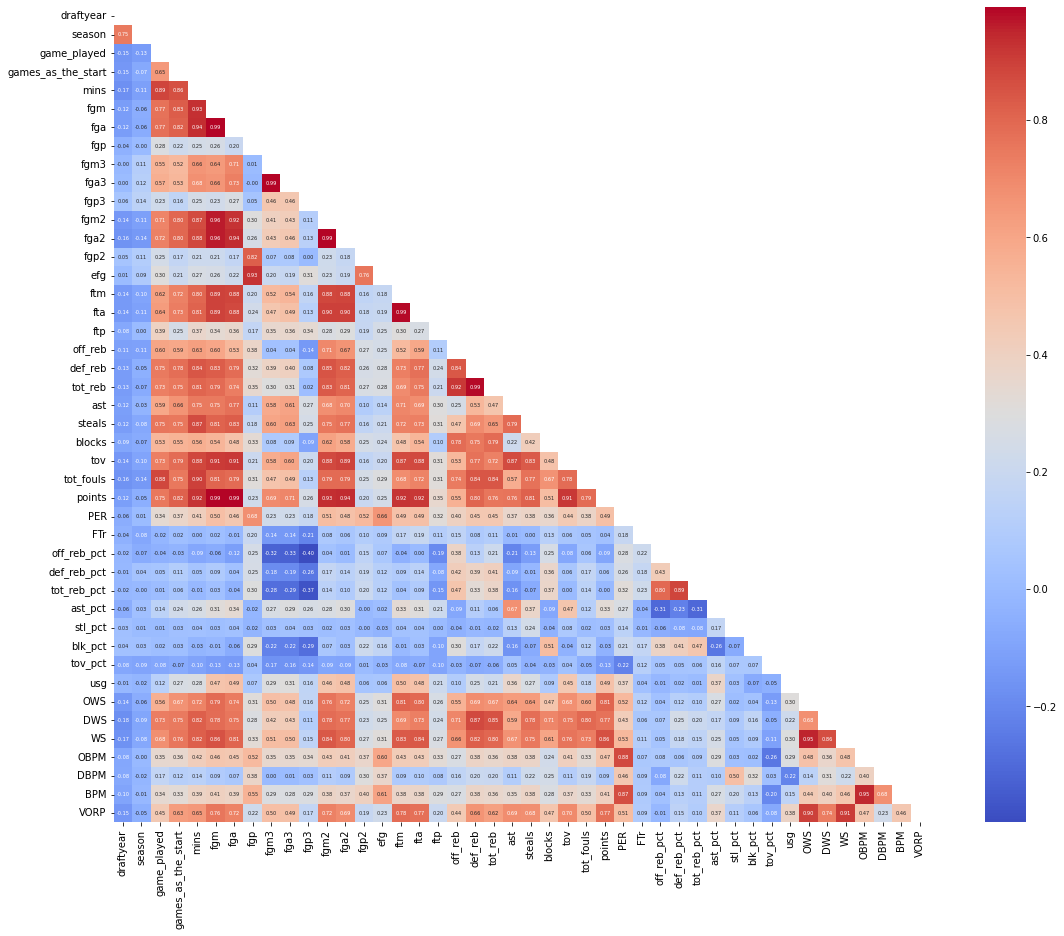

In [46]:
correlation_matrix = player_num_cols.corr()
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))#mask the duplicated part of triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, annot_kws={'size': 5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### Visualization Plots

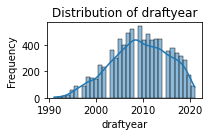

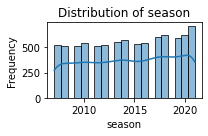

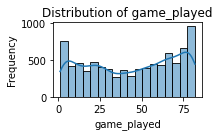

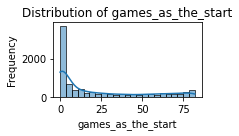

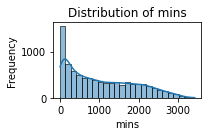

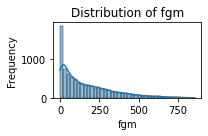

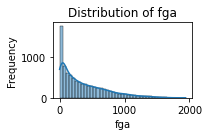

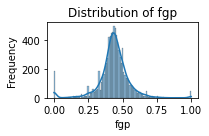

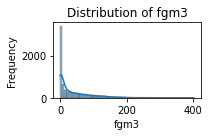

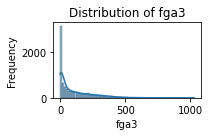

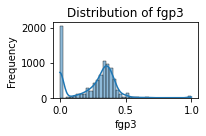

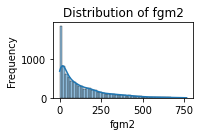

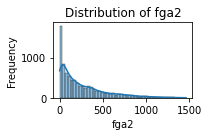

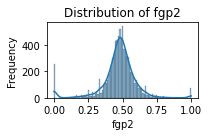

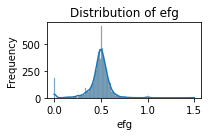

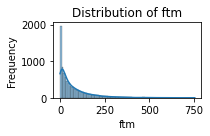

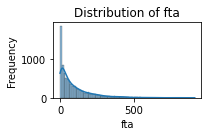

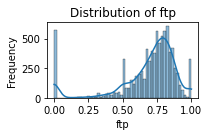

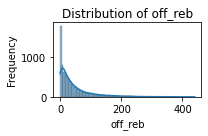

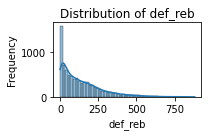

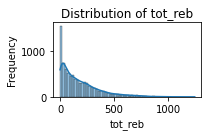

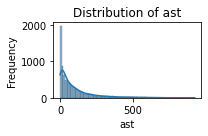

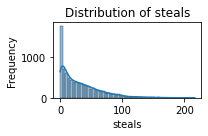

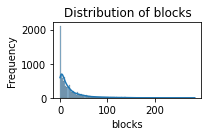

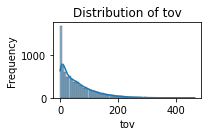

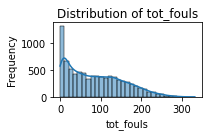

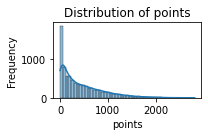

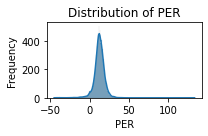

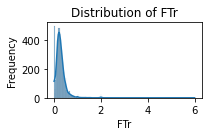

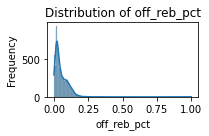

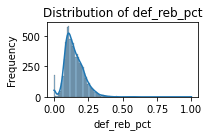

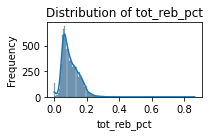

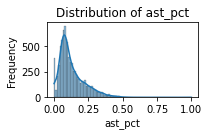

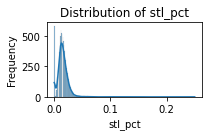

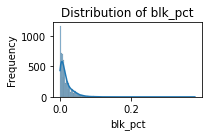

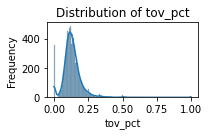

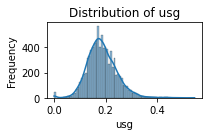

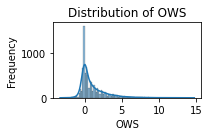

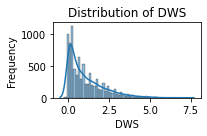

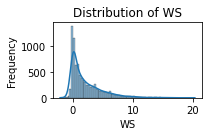

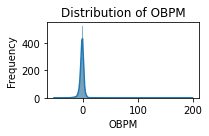

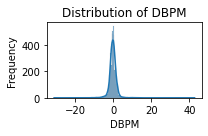

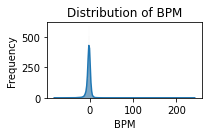

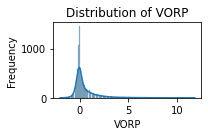

In [47]:
for col in player_num_cols:
    plt.figure(figsize=(3, 2))  # Set the figure size for each individual plot
    sns.histplot(player_data_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

### PCA Preparation

We will standard scale the dataset before performing PCA.

In [48]:
columns_name = player_num_cols.columns
player_stats_numerical = player_data_clean[columns_name]
scaler = StandardScaler()
player_stats_scaled = scaler.fit_transform(player_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(player_stats_scaled)
principalDf_player_stats = pd.DataFrame(data=principalComponents)
principalDf_player_stats

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.672355,1.919143,-2.172668,1.424548,-0.386250,-1.557440,-0.558001,0.518493,1.034742,0.872393,1.069285,-0.529165,0.279714
1,-4.292558,2.124693,-2.210512,1.277179,0.365587,-1.262501,-0.627751,0.942020,1.330222,-0.810328,1.087748,0.047708,0.536663
2,11.469243,2.866020,-3.489239,1.637805,-1.378579,1.581172,-0.073694,-1.385878,-0.301188,1.477814,-1.915162,2.572689,0.607497
3,-2.262614,-1.932332,-0.416146,1.566222,-1.293985,-0.822306,-0.996373,-0.207297,-0.325131,1.086575,0.234059,-0.201864,0.357266
4,-2.851517,-1.981929,0.261198,1.003812,0.113531,-2.223598,0.742815,-0.588422,0.198728,0.607998,-0.377405,0.850592,-0.145895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,-5.828016,-1.737403,-3.999775,-1.759689,2.447899,1.268447,2.041803,0.527670,1.663948,1.303574,-0.465467,-0.872565,-1.085719
8488,1.032472,-1.426816,1.148010,-3.718856,-0.734350,-0.134141,-0.462944,-0.064779,0.352600,-0.164082,0.746261,-0.154568,0.462648
8489,5.681881,-0.301534,-0.688965,-2.686777,0.922506,0.857799,-0.605150,1.617015,-0.011441,0.691372,-0.665803,0.662955,0.431948
8490,0.500829,-1.938444,0.837841,-0.674588,-0.061465,0.701417,-1.519396,-0.265478,-0.254493,1.013691,0.407525,-0.625881,0.413543


We will then take a look at the explained variance to see how much variance each principal component captures. Then we will choose accordingly in the part where we perform unsupervised learning.

In [49]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.43567864 0.11724928 0.08259299 0.04416969 0.04096196 0.03655665
 0.03068917 0.02260607 0.02222157 0.02146992 0.0191298  0.01747699
 0.0155553 ]


We will then perform the same process for the rest of the three datasets, including awards_data.csv, team_rebounding_data_22.csv, and team_stats.csv.

## reward data part

### Correlation Matrix

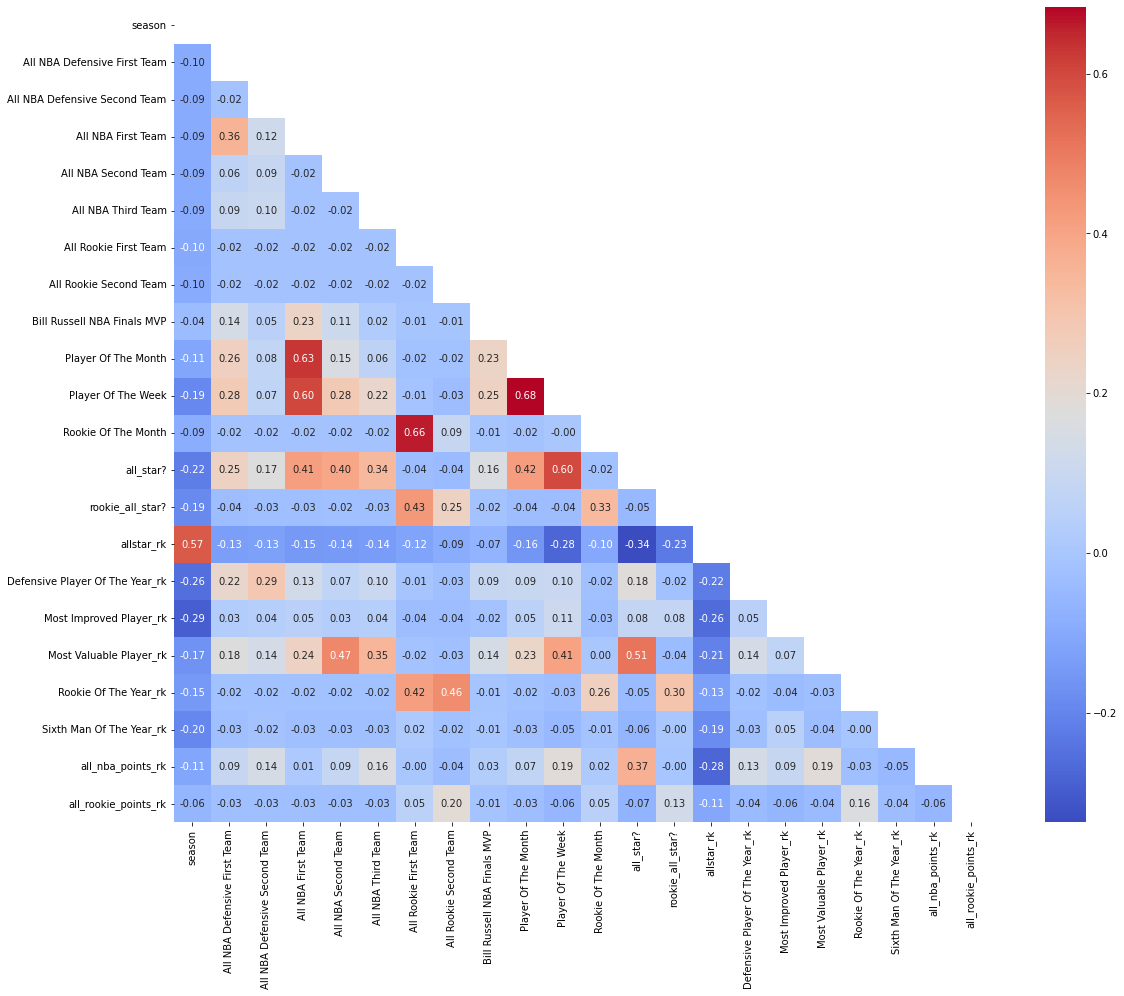

In [50]:
correlation_matrix = awards_num_cols.corr()
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))#mask the duplicated part of triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, annot_kws={'size': 10})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### Visualization Plots

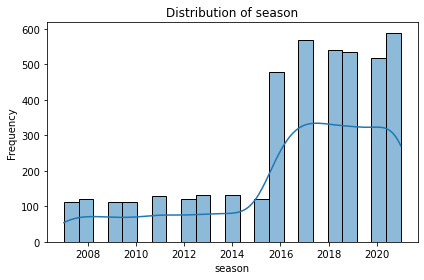

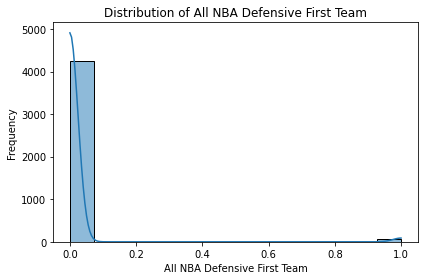

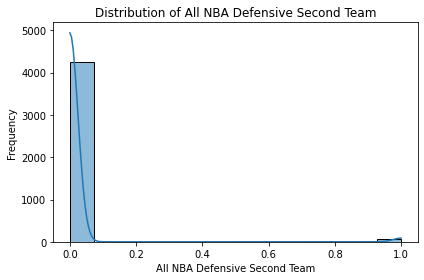

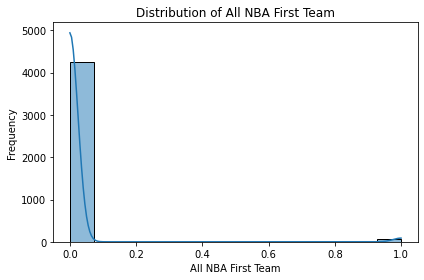

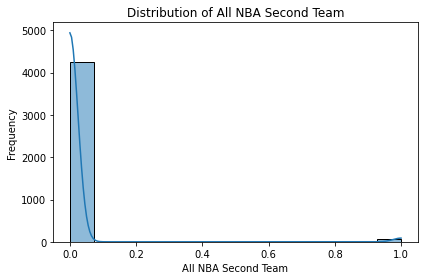

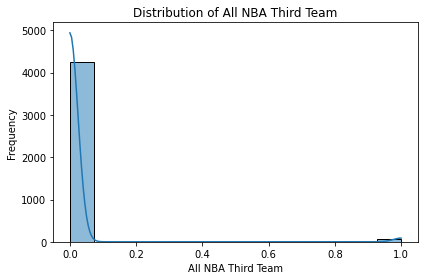

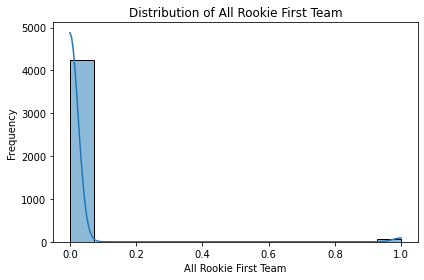

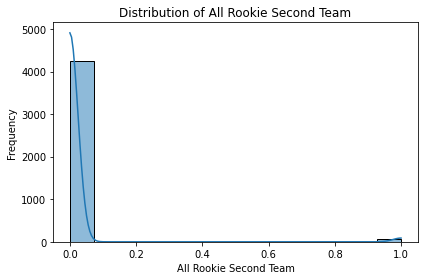

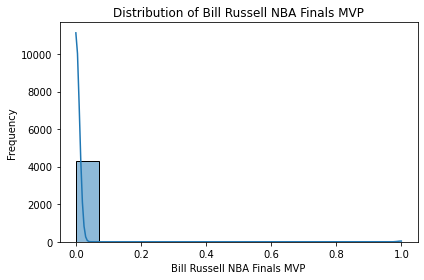

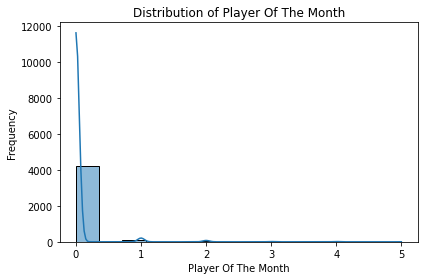

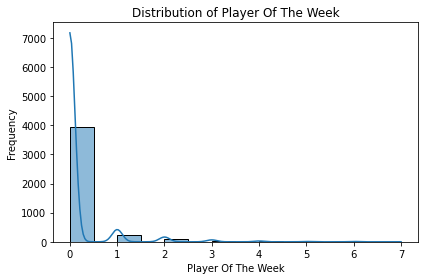

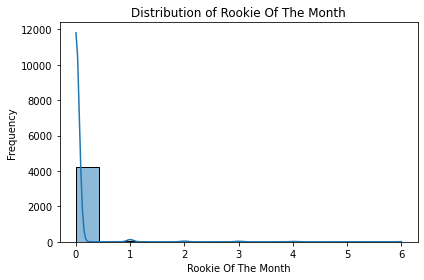

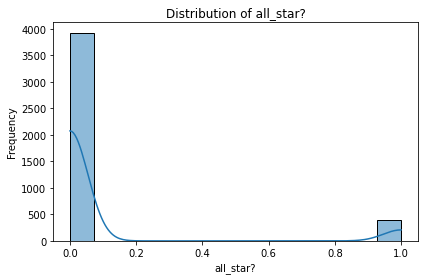

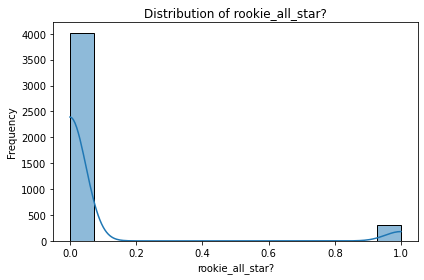

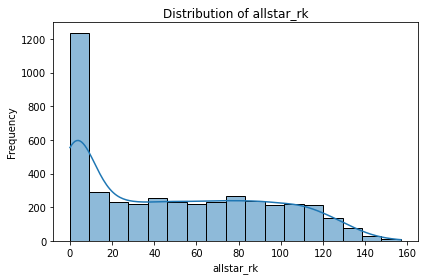

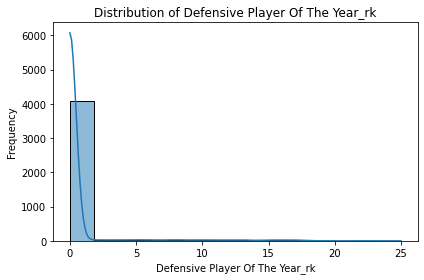

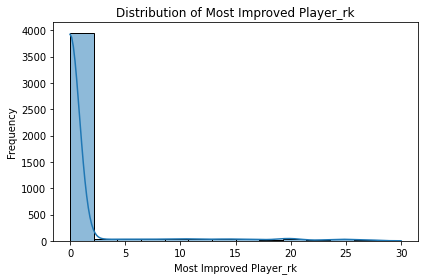

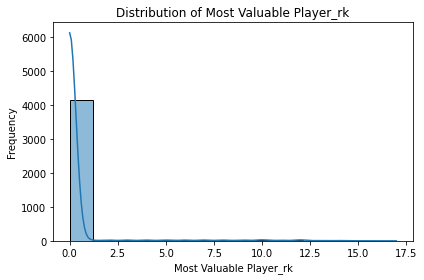

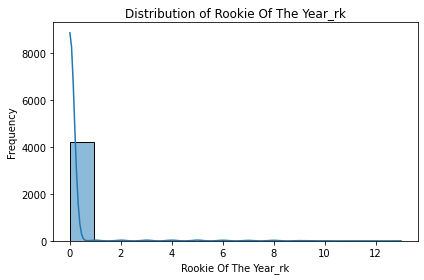

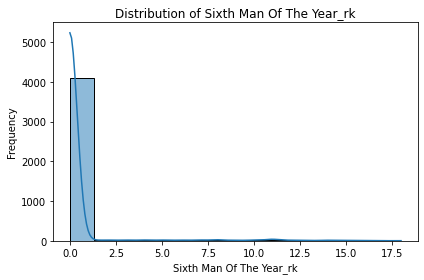

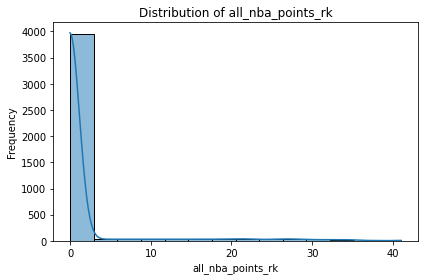

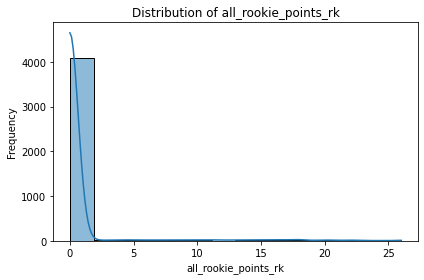

In [51]:
for col in awards_num_cols:
    plt.figure(figsize=(6, 4))  # Set the figure size for each individual plot
    sns.histplot(awards_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

### PCA Preparation

We will standard scale the dataset before performing PCA.

In [52]:
columns_name = awards_num_cols.columns
award_stats_numerical = awards_clean[columns_name]
scaler = StandardScaler()
award_stats_scaled = scaler.fit_transform(award_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(award_stats_scaled)
principalDf_player_stats = pd.DataFrame(data=principalComponents)
principalDf_player_stats

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,8.440156,-0.669155,3.612062,-3.248069,0.819703,0.952777,-1.704937,1.242831,3.426065,-0.719963,-1.165370,-2.536059,1.858326,-0.930870,-2.257085,2.348368
1,3.725572,0.186682,-0.135589,-0.536459,-0.061814,-1.292529,-0.625170,-0.171352,-0.617007,0.364925,-0.018771,-0.543790,-2.115175,0.741017,-0.832511,1.059841
2,2.020551,0.310169,-0.191438,-2.272501,0.669117,1.737142,-0.594812,1.704128,5.360431,-0.867702,-0.263381,-1.300444,1.862584,-0.612081,-2.232200,2.077934
3,4.865675,0.071907,-2.306860,3.993086,-2.166265,-3.942747,4.563203,-0.361804,1.962666,-0.448569,-1.307465,-1.254408,-0.470217,0.043521,-0.803846,0.910981
4,10.786995,-1.087195,5.856774,-5.102361,1.390756,1.722062,-1.680529,0.510756,2.154512,-0.513598,-1.380130,-3.311915,0.262411,-0.453184,-0.752592,0.636620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,-0.435861,1.302131,-0.110394,-1.199087,-2.823010,0.092080,-0.096863,0.106086,0.789162,5.713875,-1.254510,0.057324,0.849346,0.701226,0.152194,-0.289529
4317,-0.435861,1.302131,-0.110394,-1.199087,-2.823010,0.092080,-0.096863,0.106086,0.789162,5.713875,-1.254510,0.057324,0.849346,0.701226,0.152194,-0.289529
4318,-0.435861,1.302131,-0.110394,-1.199087,-2.823010,0.092080,-0.096863,0.106086,0.789162,5.713875,-1.254510,0.057324,0.849346,0.701226,0.152194,-0.289529
4319,-0.542294,0.792256,0.061013,-0.769142,-2.117118,0.091081,-0.112822,0.061490,0.558826,4.321301,-0.847800,0.015060,0.741841,0.416823,0.141861,-0.299995


We will then take a look at the explained variance to see how much variance each principal component captures. Then we will choose accordingly in the part where we perform unsupervised learning.

In [53]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.17697493 0.11597585 0.0781489  0.06498761 0.05930037 0.05408957
 0.04828576 0.04410959 0.04180999 0.04050191 0.03932972 0.03875374
 0.03032152 0.02942342 0.02439936 0.02431878]


## team data part

### Correlation Matrix

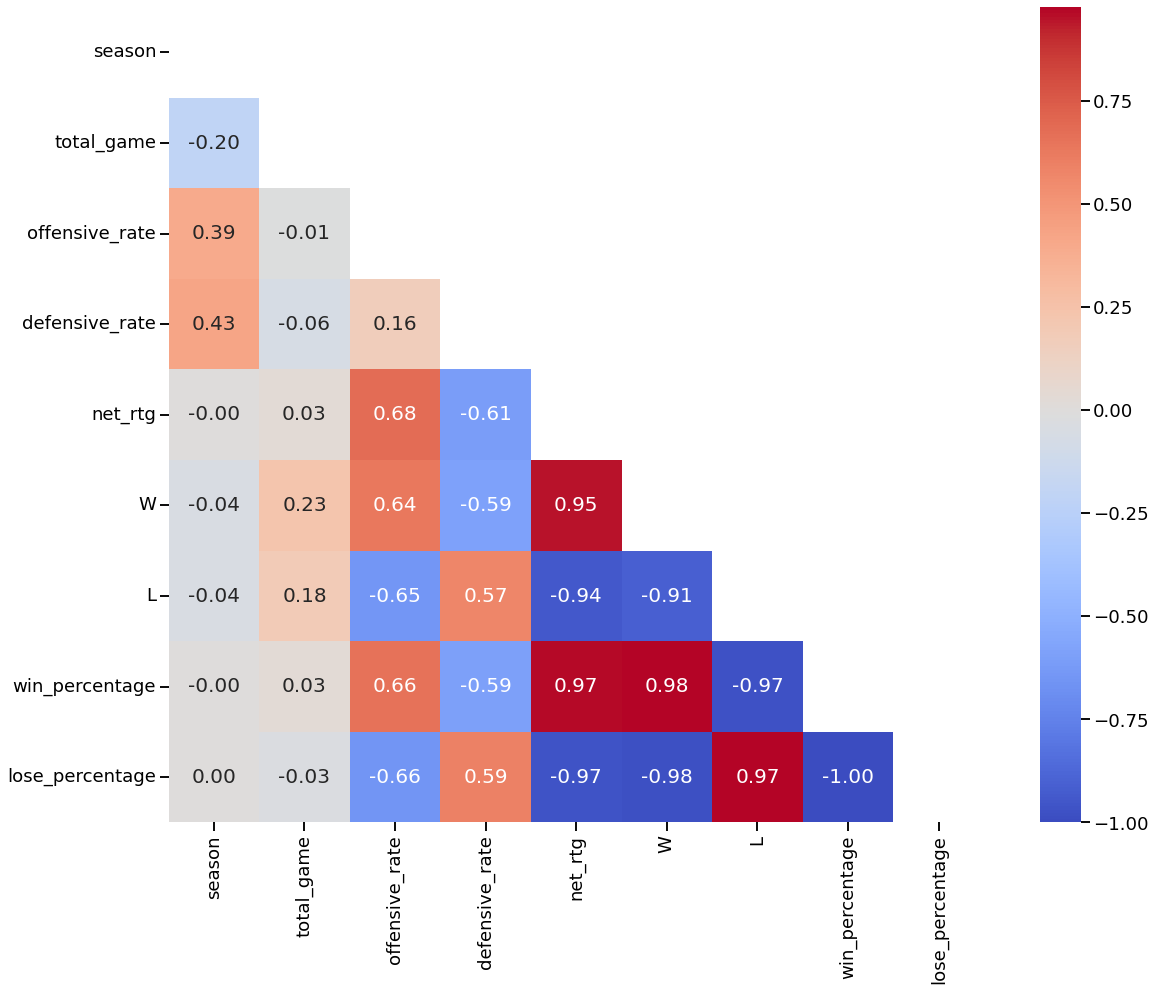

In [54]:
correlation_matrix = team_num_cols.corr()
plt.figure(figsize=(20, 15))
sns.set_context("talk", font_scale=1.1)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))#mask the duplicated part of triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, annot_kws={'size': 20})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### Visualization Plots

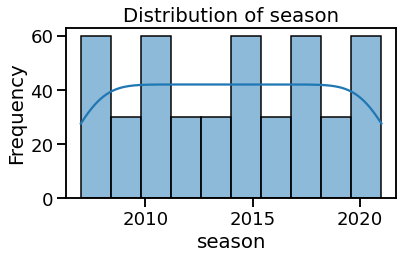

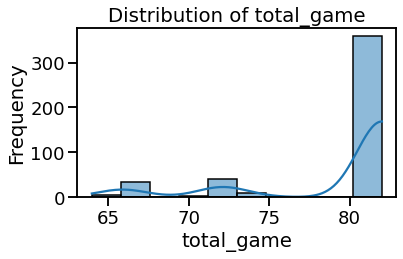

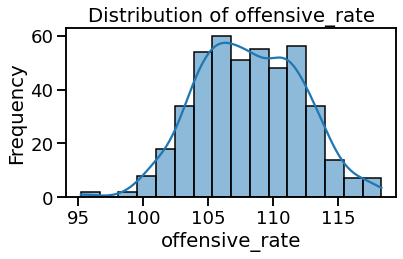

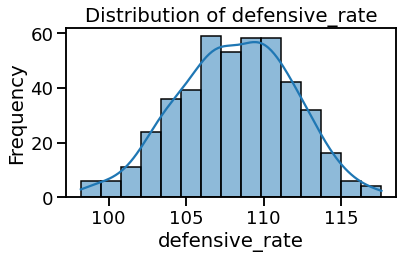

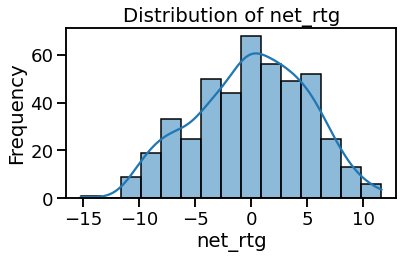

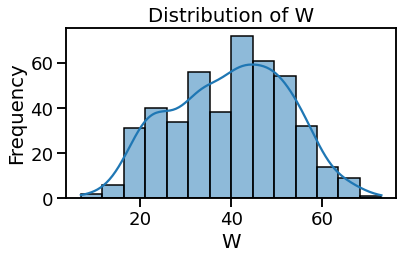

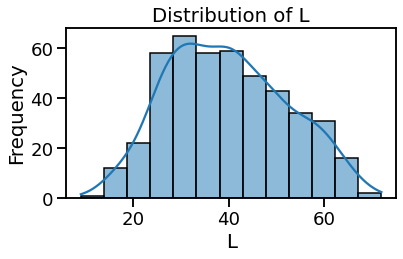

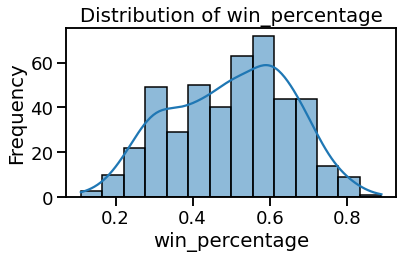

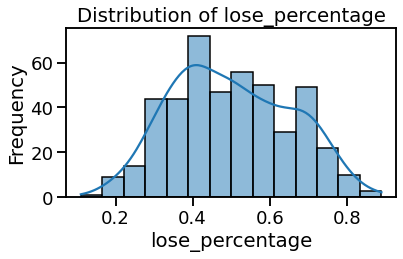

In [55]:
for col in team_num_cols:
    plt.figure(figsize=(6, 4))  # Set the figure size for each individual plot
    sns.histplot(team_data_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

### PCA Preparation

In [56]:
columns_name = team_num_cols.columns
team_stats_numerical = team_data_clean[columns_name]
scaler = StandardScaler()
team_stats_scaled = scaler.fit_transform(team_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(team_stats_scaled)
principalDf_player_stats = pd.DataFrame(data=principalComponents)
principalDf_player_stats

,0,1,2
0,0.832151,-1.244492,-0.412609
1,1.771354,-1.524464,-0.286465
2,-5.007585,-2.248026,0.181053
3,1.918419,-1.452639,-0.327394
4,1.571532,-1.846663,-0.129204
...,...,...,...
445,2.239619,2.127520,-1.154642
446,0.915859,2.007490,-1.079937
447,-1.332936,1.817541,-0.940513
448,-2.040838,2.276042,-1.161007


In [57]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.62977278 0.19123763 0.11746024]


## rebounding data part

### Correlation Matrix

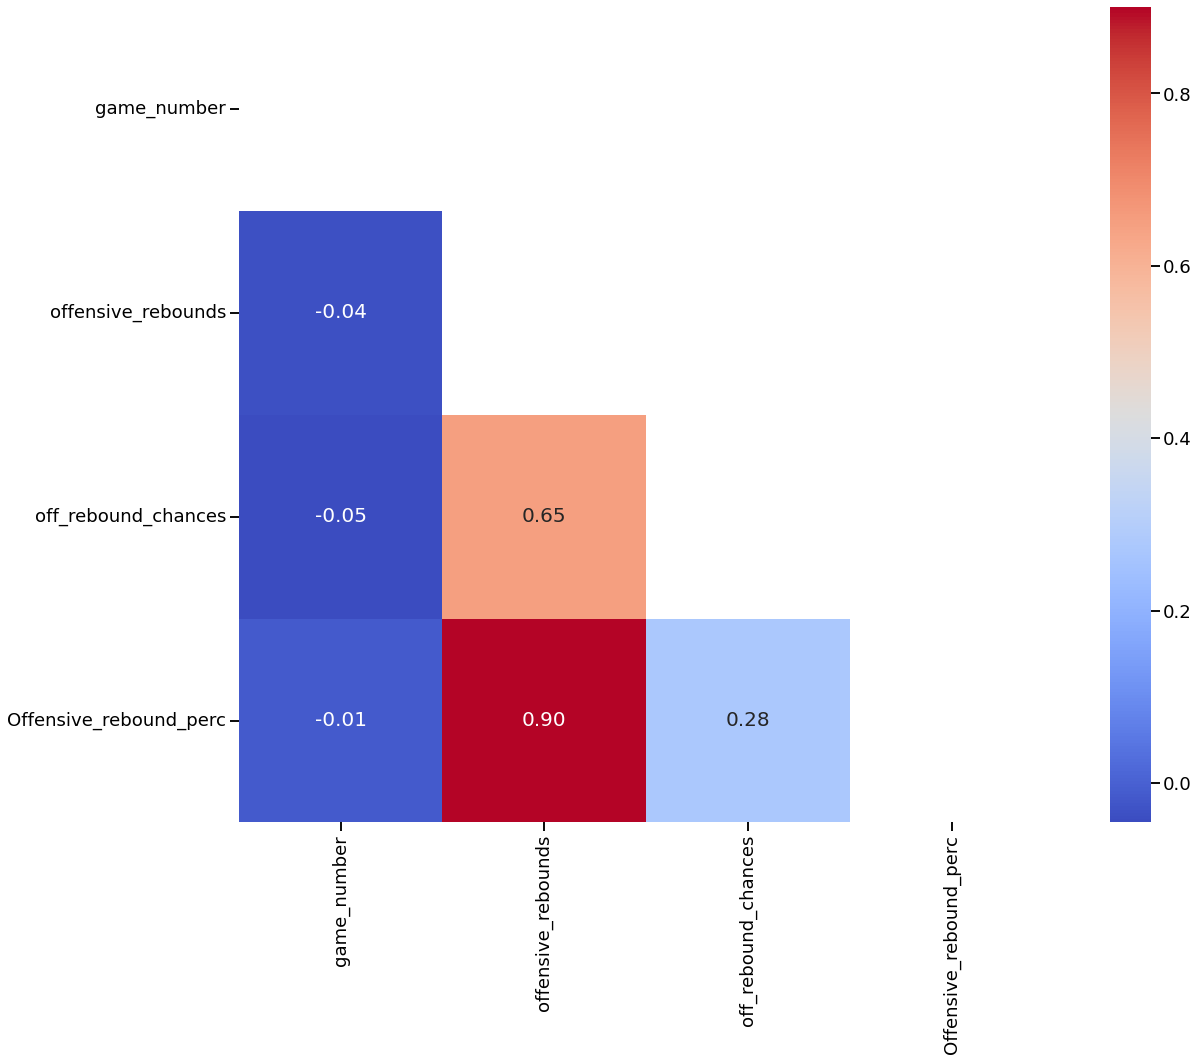

In [58]:
correlation_matrix = rebounding_num_cols.corr()
plt.figure(figsize=(20, 15))
sns.set_context("talk", font_scale=1.1)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))#mask the duplicated part of triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, annot_kws={'size': 20})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### Visualization Plots

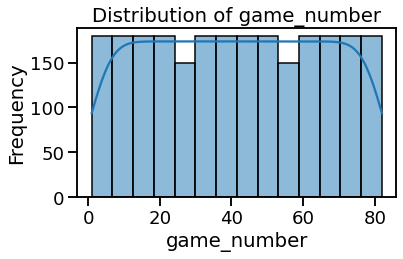

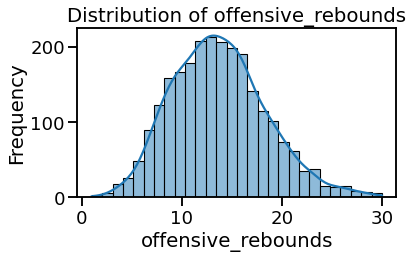

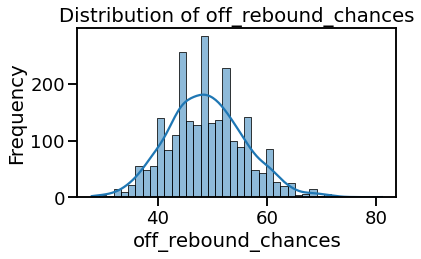

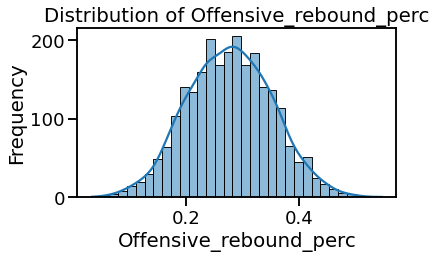

In [59]:
for col in rebounding_num_cols:
    plt.figure(figsize=(6, 4))  # Set the figure size for each individual plot
    sns.histplot(rebounding_data_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

### PCA Preparation

In [79]:
columns_name = rebounding_num_cols.columns
rebound_stats_numerical = rebounding_data_clean[columns_name]
scaler = StandardScaler()
rebound_stats_scaled = scaler.fit_transform(rebound_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(rebound_stats_scaled)
principalDf_player_stats = pd.DataFrame(data=principalComponents)
principalDf_player_stats

,0,1,2
0,1.281017,-1.671620,-1.073836
1,1.877043,-1.783874,-0.200848
2,-0.953302,-1.747302,0.694664
3,-0.397016,-1.800918,0.993653
4,0.167926,-1.692398,-0.364150
...,...,...,...
2455,-1.337672,1.723124,0.573688
2456,0.381765,1.572668,1.341135
2457,0.419835,1.474415,2.329161
2458,0.544042,1.637624,0.605767


In [80]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.56352898 0.25003522 0.18440364]


## Average number of points, rebounds, and assists per game for players in the 2007-2021 seasons who won All NBA First, Second, Third teams, and players who were in the All-Star Game

This EDA aims to analyze the basic statistics of the elite players within the NBA.

### first teams

In [62]:
awards_1st = awards_clean[['personID', 'All NBA First Team', 'season']].copy()
awards_1st.drop(awards_1st[awards_1st['All NBA First Team'] == 0.0].index, inplace = True)
awards_1st

,personID,All NBA First Team,season
0,708.0,1.0,2007
4,977.0,1.0,2007
29,2544.0,1.0,2007
32,2730.0,1.0,2007
35,101108.0,1.0,2007
...,...,...,...
658,203507.0,1.0,2021
661,203999.0,1.0,2021
663,1626164.0,1.0,2021
668,1628369.0,1.0,2021


In [63]:
# Create new df from player_data df with just nbapersonid, points, rebounds, assists, games, and season

player_data_filt = player_data_clean[['personID', 'points', 'tot_reb', 'ast', 'game_played', 'season']].copy()
player_data_filt['personID'] = player_data_filt['personID'].astype(float)
player_data_filt

,personID,points,tot_reb,ast,game_played,season
0,2585.0,322,248,36,62,2007
1,200780.0,35,42,0,35,2007
2,2746.0,1394,667,272,81,2007
3,201151.0,235,57,113,56,2007
4,101136.0,200,24,28,35,2007
...,...,...,...,...,...,...
8487,1630648.0,5,8,0,4,2021
8488,1630557.0,634,209,85,77,2021
8489,1628398.0,1130,561,233,66,2021
8490,203526.0,526,134,217,70,2021


In [64]:
# Merge awards_1st and player_data_filt to see NBA All First Team points, games, and season

merged_1st = player_data_filt.merge(awards_1st, left_on = ['personID', 'season'],
                                   right_on = ['personID', 'season'], how = 'inner')
merged_1st

,personID,points,tot_reb,ast,game_played,season,All NBA First Team
0,708.0,1337,655,244,71,2007,1.0
1,2544.0,2250,592,539,75,2007,1.0
2,977.0,2323,517,441,82,2007,1.0
3,101108.0,1684,321,925,80,2007,1.0
4,2730.0,1695,1161,110,82,2007,1.0
...,...,...,...,...,...,...,...
70,1628369.0,2046,609,334,76,2021,1.0
71,1629029.0,1847,593,568,65,2021,1.0
72,203999.0,2004,1019,584,74,2021,1.0
73,203507.0,2002,778,388,67,2021,1.0


In [65]:
# define a function to average the points, rebounds, assists per game of all the All NBA First Team players

def avg_pps(df):
    total_points = df['points'].sum()
    total_games = df['game_played'].sum()
    ppg = total_points / total_games
    return ppg

def avg_rebs(df):
    total_points = df['tot_reb'].sum()
    total_games = df['game_played'].sum()
    reb = total_points / total_games
    return reb

def avg_asts(df):
    total_points = df['ast'].sum()
    total_games = df['game_played'].sum()
    asts = total_points / total_games
    return asts

print('Average points:', avg_pps(merged_1st), 'Average rebounds:', avg_rebs(merged_1st), 
      'Average assists:', avg_asts(merged_1st))

Average points: 25.845622956774427 Average rebounds: 8.031783508899382 Average assists: 5.921540138031238


### second teams

In [66]:
# Repeat same steps for NBA All Second Team

awards_2nd = awards_clean[['personID', 'All NBA Second Team', 'season']].copy()
awards_2nd.drop(awards_2nd[awards_2nd['All NBA Second Team'] == 0.0].index, inplace = True)

merged_2nd = awards_2nd.merge(player_data_filt, how = 'inner', left_on = 'personID', right_on = 'personID')

print('Average points:', avg_pps(merged_2nd), 'Average rebounds:', avg_rebs(merged_2nd), 
      'Average assists:', avg_asts(merged_2nd))

Average points: 20.200686043753535 Average rebounds: 6.710675643622165 Average assists: 5.099330377506523


### third team

In [67]:
# Repeat same steps for NBA All Third Team

awards_3rd = awards_clean[['personID', 'All NBA Third Team', 'season']].copy()
awards_3rd = awards_3rd.dropna()
awards_3rd.drop(awards_3rd[awards_3rd['All NBA Third Team'] == 0.0].index, inplace = True)

merged_3rd = awards_3rd.merge(player_data_filt, how = 'inner', left_on = 'personID', right_on = 'personID')

print('Average points:', avg_pps(merged_3rd), 'Average rebounds:', avg_rebs(merged_3rd), 
      'Average assists:', avg_asts(merged_3rd))

Average points: 18.079576680282212 Average rebounds: 6.799721500185666 Average assists: 4.2092833271444485


### all star

In [68]:
# Repeat same steps for players who made the all star game

awards_allstar = awards_clean[['personID', 'all_star?', 'season']].copy()
awards_allstar = awards_allstar.dropna()
awards_allstar.drop(awards_allstar[awards_allstar['all_star?'] == False].index, inplace = True)

merged_allstar = awards_allstar.merge(player_data_filt, how = 'inner', left_on = 'personID',
                                      right_on = 'personID')

print('Average points:', avg_pps(merged_allstar), 'Average rebounds:', avg_rebs(merged_allstar), 
      'Average assists:', avg_asts(merged_allstar))

Average points: 19.392791988859823 Average rebounds: 6.519281213905071 Average assists: 4.628873064592157


## Average points, rebounds, assists for all NBA players

This EDA aims to analyze the basic statistics of all players who were in the NBA.

In [69]:
player_data_clean.head()

,personID,name,draftyear,season,teamID,team,game_played,games_as_the_start,mins,fgm,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,zaza pachulia,2003,2007,1610612737,ATL,62,5,944,107,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,solomon jones,2006,2007,1610612737,ATL,35,0,145,12,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,josh smith,2004,2007,1610612737,ATL,81,81,2873,518,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,acie law,2007,2007,1610612737,ATL,56,6,865,95,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,salim stoudamire,2005,2007,1610612737,ATL,35,0,402,65,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1


In [70]:
# Average points, rebounds, assists for all NBA players

player_data_avg = player_data_clean[['personID', 'name', 'season', 'game_played', 'points', 'tot_reb', 'ast']]
player_data_avg

,personID,name,season,game_played,points,tot_reb,ast
0,2585,zaza pachulia,2007,62,322,248,36
1,200780,solomon jones,2007,35,35,42,0
2,2746,josh smith,2007,81,1394,667,272
3,201151,acie law,2007,56,235,57,113
4,101136,salim stoudamire,2007,35,200,24,28
...,...,...,...,...,...,...,...
8487,1630648,jordan schakel,2021,4,5,8,0
8488,1630557,corey kispert,2021,77,634,209,85
8489,1628398,kyle kuzma,2021,66,1130,561,233
8490,203526,raul neto,2021,70,526,134,217


In [71]:
player_data_avg['avg points'] = player_data_avg.apply(lambda row: row.points / row.game_played, axis = 1)
player_data_avg['avg rebounds'] = player_data_avg.apply(lambda row: row.tot_reb / row.game_played, axis = 1)
player_data_avg['avg assists'] = player_data_avg.apply(lambda row: row.ast / row.game_played, axis = 1)
player_data_avg

,personID,name,season,game_played,points,tot_reb,ast,avg points,avg rebounds,avg assists
0,2585,zaza pachulia,2007,62,322,248,36,5.193548,4.000000,0.580645
1,200780,solomon jones,2007,35,35,42,0,1.000000,1.200000,0.000000
2,2746,josh smith,2007,81,1394,667,272,17.209877,8.234568,3.358025
3,201151,acie law,2007,56,235,57,113,4.196429,1.017857,2.017857
4,101136,salim stoudamire,2007,35,200,24,28,5.714286,0.685714,0.800000
...,...,...,...,...,...,...,...,...,...,...
8487,1630648,jordan schakel,2021,4,5,8,0,1.250000,2.000000,0.000000
8488,1630557,corey kispert,2021,77,634,209,85,8.233766,2.714286,1.103896
8489,1628398,kyle kuzma,2021,66,1130,561,233,17.121212,8.500000,3.530303
8490,203526,raul neto,2021,70,526,134,217,7.514286,1.914286,3.100000


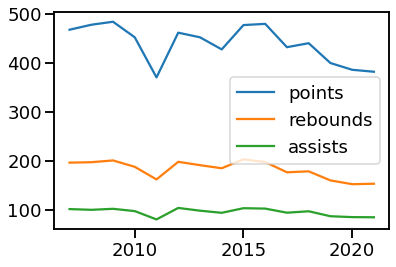

In [72]:
# Average points, rebounds, assists for all NBA players per season

player_data_avg_season = player_data_avg.groupby('season')[['points', 'tot_reb', 'ast']].mean()


plt.plot(player_data_avg_season.index, player_data_avg_season['points'], label = 'points')
plt.plot(player_data_avg_season.index, player_data_avg_season['tot_reb'], label = 'rebounds')
plt.plot(player_data_avg_season.index, player_data_avg_season['ast'], label = 'assists')
plt.legend()
plt.show()

## Average time it takes for a player to make an all NBA team selection

This EDA aims to analyze how long it takes on average for a player to be selected to an All NBA team (if they do manage to get selected at all).

In [73]:
awards_clean

,season,personID,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star?,rookie_all_star?,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,2015,1626170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
4325,2015,1626202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
4326,2015,1626273.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
4327,2018,1628971.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0


In [74]:
# Create new df from awards with just All NBA First, Second and Third Team players

awards_allnba = awards_clean[['season', 'personID', 'All NBA First Team', 'All NBA Second Team',
                        'All NBA Third Team']].copy()
awards_allnba = awards_allnba.dropna()
awards_allnba = awards_allnba[((awards_allnba["All NBA First Team"] != 0.0) |
                              (awards_allnba["All NBA Second Team"] != 0.0) |
                              (awards_allnba["All NBA Third Team"] != 0.0))]
awards_allnba

,season,personID,All NBA First Team,All NBA Second Team,All NBA Third Team
0,2007,708.0,1.0,0.0,0.0
3,2007,959.0,0.0,1.0,0.0
4,2007,977.0,1.0,0.0,0.0
6,2007,1495.0,0.0,1.0,0.0
7,2007,1503.0,0.0,0.0,1.0
...,...,...,...,...,...
666,2021,1627783.0,0.0,0.0,1.0
668,2021,1628369.0,1.0,0.0,0.0
676,2021,1629027.0,0.0,0.0,1.0
677,2021,1629029.0,1.0,0.0,0.0


In [75]:
# Replace duplicate All NBA player seasons with the earliest season

awards_allnba = awards_allnba.drop_duplicates('personID', keep = 'first')
awards_allnba

,season,personID,All NBA First Team,All NBA Second Team,All NBA Third Team
0,2007,708.0,1.0,0.0,0.0
3,2007,959.0,0.0,1.0,0.0
4,2007,977.0,1.0,0.0,0.0
6,2007,1495.0,0.0,1.0,0.0
7,2007,1503.0,0.0,0.0,1.0
...,...,...,...,...,...
614,2020,203078.0,0.0,0.0,1.0
620,2020,203944.0,0.0,1.0,0.0
663,2021,1626164.0,1.0,0.0,0.0
676,2021,1629027.0,0.0,0.0,1.0


In [76]:
# Filter player_data to just nbapersonid, player, draftyear, and season

player_data_filt2 =player_data_clean[['personID', 'name', 'draftyear', 'season']].copy()

In [77]:
# Merge awards_allnba and player_data_filt2

merged_awards_allnba = player_data_filt2.merge(awards_allnba, how = 'inner',
                                                left_on = ['personID', 'season'],
                                               right_on = ['personID', 'season'])
merged_awards_allnba

,personID,name,draftyear,season,All NBA First Team,All NBA Second Team,All NBA Third Team
0,708,kevin garnett,1995,2007,1.0,0.0,0.0
1,1718,paul pierce,1998,2007,0.0,0.0,1.0
2,2544,lebron james,2003,2007,1.0,0.0,0.0
3,1717,dirk nowitzki,1998,2007,0.0,1.0,0.0
4,2397,yao ming,2002,2007,0.0,0.0,1.0
...,...,...,...,...,...,...,...
69,203944,julius randle,2014,2020,0.0,1.0,0.0
70,203078,bradley beal,2012,2020,0.0,0.0,1.0
71,1629027,trae young,2018,2021,0.0,0.0,1.0
72,1629630,ja morant,2019,2021,0.0,1.0,0.0


In [78]:
# Subtract all values of draftyear column from season column and average the values

avg_exp = (merged_awards_allnba['season'].sum() - merged_awards_allnba['draftyear'].sum()) / len(merged_awards_allnba)
print('average years it takes to make an All NBA team:', avg_exp)

average years it takes to make an All NBA team: 5.297297297297297
